<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/momentum_monthly_3_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


Dados com retornos mensais

In [2]:
periodo = '3y'
# carteira de small caps
small = pd.read_csv('https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_Small.csv',
                    sep=';' , decimal=',' , thousands='.' , header=1 , skiprows=0 , skipfooter=2 , 
                    encoding='latin-1',index_col=False , engine='python')
lista = (small['Código']+'.SA').to_list()+['BOVA11.SA']

In [3]:
data = yf.download(lista,period=periodo)['Adj Close'].resample('M').last().pct_change()

[*********************100%%**********************]  116 of 116 completed


In [4]:
data.tail()

Ticker,AALR3.SA,ABCB4.SA,AESB3.SA,AGRO3.SA,ALOS3.SA,ALPA4.SA,ALUP11.SA,AMAR3.SA,AMBP3.SA,ANIM3.SA,...,UNIP6.SA,USIM5.SA,VAMO3.SA,VIVA3.SA,VLID3.SA,VULC3.SA,VVEO3.SA,WIZC3.SA,YDUQ3.SA,ZAMP3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-30,0.169231,0.175307,0.079444,-0.025869,0.117031,0.160000,0.033836,0.541833,0.093040,0.526923,...,0.043448,0.189107,0.178799,0.165882,0.285714,0.202951,-0.059772,0.164032,0.133108,-0.083465
2023-12-31,-0.087719,0.138699,0.133395,0.108299,0.037920,0.057471,0.092959,-0.038760,0.089142,0.123426,...,0.053085,0.181934,0.126835,0.152035,0.022783,-0.058438,-0.003571,0.230900,0.115978,-0.020619
2024-01-31,-0.187500,-0.010537,-0.075487,-0.076750,-0.075330,-0.152174,-0.076484,-0.295699,-0.154462,-0.015695,...,-0.082256,-0.010764,-0.188679,-0.013139,0.001463,0.019653,-0.275986,-0.081379,-0.140053,-0.126316
2024-02-29,0.005917,-0.010063,-0.083407,-0.038118,0.005703,0.185315,0.023368,-0.129771,0.075691,0.166287,...,-0.058614,0.204570,0.068543,-0.032544,-0.089625,-0.014346,-0.163366,-0.067568,0.056017,-0.162651
2024-03-31,0.078824,0.026260,-0.022988,0.035413,-0.031187,-0.062930,0.026192,-0.188596,0.055480,-0.042969,...,0.023541,-0.095754,-0.043528,-0.223242,-0.010701,-0.028352,-0.272189,0.165861,-0.110511,-0.187050


In [5]:
def rolling_ret( df , m):
  '''
    df : dataframe com retornos 
    calcula retorno acumulado na janela de m periodos
  '''
  return (df+1).rolling(m).apply(np.prod) - 1 

def get_top( df , date , n=3):
  '''
    determina as colunas de df com os 3 maiores valores na data 'date'
  '''
  top = df.loc[date].nlargest(n).index
  return top.to_list()

def port_ret(df , date ,  port = None):
  '''
    calcula a média em 'df' dos retornos de 'port' na data 'date' 
  '''
  
  if port is None : port = get_top(data , date )

  porta = df.loc[date:,port]
  return porta.mean(axis=1).values[0]

In [6]:
date = '2024-03-31'
# quando rendeu em mar-24 as carteira com as 3 small mais rentáveis
print( date , get_top(data , date ) , port_ret( rolling_ret(data,1) , date ))

2024-03-31 ['GUAR3.SA', 'STBP3.SA', 'POSI3.SA'] 0.305240356792986


In [7]:
data.loc[date].nlargest(3)

Ticker
GUAR3.SA    0.383333
STBP3.SA    0.278320
POSI3.SA    0.254068
Name: 2024-03-31 00:00:00, dtype: float64

### momentum

usando  retornos em janelas moveis

In [130]:
janela = 12
tam_carteira = 3

In [131]:
ret = rolling_ret(data,janela)
ret.tail()

Ticker,AALR3.SA,ABCB4.SA,AESB3.SA,AGRO3.SA,ALOS3.SA,ALPA4.SA,ALUP11.SA,AMAR3.SA,AMBP3.SA,ANIM3.SA,...,UNIP6.SA,USIM5.SA,VAMO3.SA,VIVA3.SA,VLID3.SA,VULC3.SA,VVEO3.SA,WIZC3.SA,YDUQ3.SA,ZAMP3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-30,-0.435644,0.208285,0.040327,-0.004034,NaN,-0.428657,0.185862,-0.477027,-0.286778,-0.101810,...,-0.227061,0.053773,-0.281089,0.371943,1.430186,0.775940,-0.144352,-0.202775,0.768616,-0.021849
2023-12-31,-0.518519,0.375172,0.275362,-0.002281,NaN,-0.328912,0.233487,-0.404800,-0.130281,0.155440,...,-0.101219,0.360298,-0.168017,0.554454,1.436870,0.700294,-0.132460,0.118491,1.231855,0.045872
2024-01-31,-0.604956,0.366354,0.127723,-0.073910,NaN,-0.369581,0.130377,-0.620290,-0.358269,-0.006787,...,-0.149343,0.129530,-0.416411,0.404421,1.335609,0.832066,-0.466766,0.020192,0.889549,-0.086238
2024-02-29,-0.590361,0.430110,0.052419,0.023342,NaN,0.078473,0.200040,-0.276191,-0.186778,0.605016,...,-0.138101,0.699254,-0.313487,0.536157,1.211616,0.841649,-0.518665,0.003871,1.923748,-0.133056
2024-03-31,-0.592987,0.582775,0.026157,0.140479,NaN,0.169325,0.262166,-0.421875,-0.177661,0.952191,...,-0.001445,0.439587,-0.346813,0.170006,1.040115,0.715368,-0.605301,0.331600,1.600643,-0.270968


#### próximo mês

In [132]:
date = ret.index[-1].date().strftime("%Y-%m-%d")
prox = ret.loc[date].nlargest(tam_carteira).index.values
print('proxima carteira: ' , *prox)

proxima carteira:  CEAB3.SA TEND3.SA ENAT3.SA


In [133]:
carteiras = []
for date in ret.index:
    # print(date.date() , get_top( ret , date , tam_carteira), port_ret( data , date ,  get_top( ret , date) ))
    carteiras.append(get_top( ret , date , tam_carteira))

In [134]:
print(*carteiras)

['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'UNIP6.SA', 'INTB3.SA'] ['AALR3.SA', 'ORVR3.SA', 'SMTO3.SA'] ['RECV3.SA', 'ENAT3.SA', 'AALR3.SA'] ['AALR3.SA', 'BEEF3.SA', 'RECV3.SA'] ['AALR3.SA', 'BEEF3.SA', 'KEPL3.SA'] ['CIEL3.SA', 'BEEF3.SA', 'KEPL3.SA'] ['CIEL3.SA', 'KEPL3.SA', 'MILS3.SA'] ['CIEL3.SA', 'MILS3.SA', 'RECV3.SA'] ['CIEL3.SA', 'RECV3.SA', 'KEPL3.SA'] ['CIEL3.SA', 'CURY3.SA', 'RECV3.SA'] ['CIEL3.SA', 'KEPL3.SA', 'CURY3.SA'] ['CIEL3.SA', 'MILS3.SA', 'CURY3.SA'] ['PLPL3.SA', 'CURY3.SA', 'CIEL3.SA'] ['PLPL3.SA', 'CURY3.SA', 'CIEL3.SA'] ['PLPL3.SA', 'CURY3.SA', 'ONCO3.SA'] [

In [135]:
## a carteira roda no mes seguinte
retornos = [0.0]
for i in range(1,len(data)): 
  # print(data.index[i].date() , carteiras[i-1] , port_ret( data , data.index[i] , carteiras[i-1] ))
  retornos.append(port_ret( data , data.index[i] , carteiras[i-1] ))

In [136]:
compara = pd.DataFrame({'returns' : retornos , 'ibov' : data['BOVA11.SA']} , index=data.index)
compara.ibov.iloc[0] = 0.0
# compara

<Axes: xlabel='Date'>

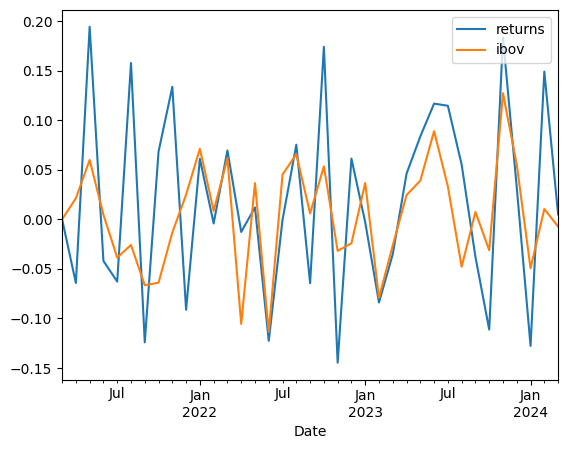

In [137]:
compara.plot()

In [138]:
compara['indice_acum'] = (compara.ibov+1.0).cumprod()
compara['cartei_acum'] = (compara.returns+1.0).cumprod()
compara.tail()

,returns,ibov,indice_acum,cartei_acum
Date,,,,
2023-11-30,0.183252,0.127258,1.103107,1.578740
2023-12-31,0.032104,0.055191,1.163989,1.629424
2024-01-31,-0.127822,-0.049390,1.106499,1.421147
2024-02-29,0.149087,0.010488,1.118104,1.633022
2024-03-31,0.005042,-0.007345,1.109891,1.641256


<Axes: xlabel='Date'>

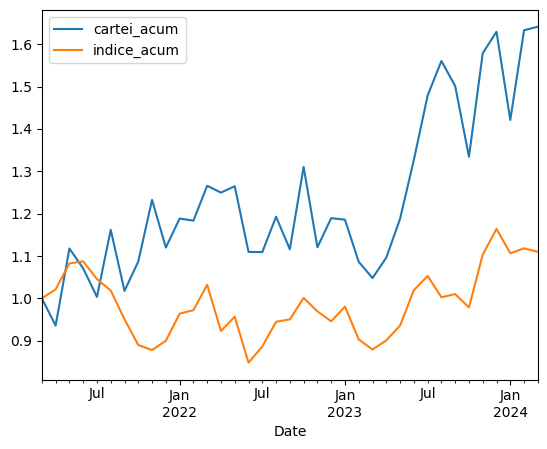

In [139]:
compara[['cartei_acum','indice_acum']].plot()